In [15]:
#import dataset and reset index
import pandas as pd
players_df = pd.read_pickle("players_df.pkl")
players_df = players_df.reset_index()

In [16]:
#we remove rows based on Nas on these specific columns
players_df = players_df.dropna(subset=["stats.wardsPlaced","stats.wardsKilled"])

In [20]:
#set a size for the subset we will be working with
size=50000

In [24]:
#create subsets to work with, select columns we want
x = players_df[["stats.kills","stats.deaths","stats.assists","stats.totalDamageDealt","stats.magicDamageDealt","stats.physicalDamageDealt","stats.trueDamageDealt","stats.totalDamageDealtToChampions","stats.magicDamageDealtToChampions","stats.physicalDamageDealtToChampions","stats.trueDamageDealtToChampions","stats.totalHeal","stats.damageSelfMitigated","stats.damageDealtToObjectives","stats.damageDealtToTurrets","stats.totalDamageTaken","stats.magicalDamageTaken","stats.physicalDamageTaken","stats.trueDamageTaken","stats.goldEarned","stats.goldSpent","stats.turretKills","stats.inhibitorKills","stats.totalMinionsKilled","stats.neutralMinionsKilled","stats.champLevel","stats.wardsPlaced","stats.wardsKilled"]]
y = players_df[["championId","spell1Id","spell2Id","timeline.role","timeline.lane"]]

In [10]:
import numpy as np
from sklearn import preprocessing

In [11]:
#we connvert our dataframe into a matrix to easily operate with it
matrix_df = x.to_numpy()

In [12]:
x["products"] = pd.NA #create new empty column where we will store our generated data

In [13]:
#normalize our matrix
matrix_df = matrix_df/np.linalg.norm(matrix_df)

In [14]:
lent = len(x)
cnt = 0
for i in range(lent):
    cnt += 1
    products = []
    player = np.array(x.iloc[i].values[:-1])
    player = player/np.linalg.norm(player)
    x["products"].iloc[i] = matrix_df.dot(player) #use dot product, each row is one vector
    #this dot product is like taking it for each row of de df but in one operation(more efficient)

    print(format(i)+"/"+format(lent)) #this is for progress tracking


/var/folders/nc/l6y7znsd68z5g8ldgmy_rwyr0000gn/T/ipykernel_56882/2730780369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["products"].iloc[i] = matrix_df.dot(player) #use dot product, each row is one vector


0/5000
1/5000
2/5000
3/5000
4/5000
5/5000
6/5000
7/5000
8/5000
9/5000
10/5000
11/5000
12/5000
13/5000
14/5000
15/5000
16/5000
17/5000
18/5000
19/5000
20/5000
21/5000
22/5000
23/5000
24/5000
25/5000
26/5000
27/5000
28/5000
29/5000
30/5000
31/5000
32/5000
33/5000
34/5000
35/5000
36/5000
37/5000
38/5000
39/5000
40/5000
41/5000
42/5000
43/5000
44/5000
45/5000
46/5000
47/5000
48/5000
49/5000
50/5000
51/5000
52/5000
53/5000
54/5000
55/5000
56/5000
57/5000
58/5000
59/5000
60/5000
61/5000
62/5000
63/5000
64/5000
65/5000
66/5000
67/5000
68/5000
69/5000
70/5000
71/5000
72/5000
73/5000
74/5000
75/5000
76/5000
77/5000
78/5000
79/5000
80/5000
81/5000
82/5000
83/5000
84/5000
85/5000
86/5000
87/5000
88/5000
89/5000
90/5000
91/5000
92/5000
93/5000
94/5000
95/5000
96/5000
97/5000
98/5000
99/5000
100/5000
101/5000
102/5000
103/5000
104/5000
105/5000
106/5000
107/5000
108/5000
109/5000
110/5000
111/5000
112/5000
113/5000
114/5000
115/5000
116/5000
117/5000
118/5000
119/5000
120/5000
121/5000
122/5000
123

In [65]:
np.where(x["products"].iloc[0] > 0.1) #we see we are getting very few correlation, vectors are quite appart, we should drop columns.

(array([], dtype=int64),)

Lets start again

In [66]:
x = players_df[["stats.kills","stats.deaths","stats.assists","stats.magicDamageDealt","stats.physicalDamageDealt","stats.totalDamageDealtToChampions","stats.magicDamageDealtToChampions","stats.physicalDamageDealtToChampions","stats.totalHeal","stats.damageSelfMitigated","stats.damageDealtToObjectives","stats.damageDealtToTurrets","stats.totalDamageTaken","stats.goldSpent","stats.turretKills","stats.totalMinionsKilled"]][:size]
y = players_df[["championId","spell1Id","spell2Id","timeline.role","timeline.lane"]][:size]

In [67]:
#we connvert our dataframe into a matrix to easily operate with it
matrix_df = x.to_numpy()

In [68]:
x["products"] = pd.NA #create new empty column where we will store our generated data

In [69]:
#normalize our matrix
matrix_df = matrix_df/np.linalg.norm(matrix_df)

In [70]:
lent = len(x)
cnt = 0
for i in range(lent):
    cnt += 1
    products = []
    player = np.array(x.iloc[i].values[:-1])
    player = player/np.linalg.norm(player)
    x["products"].iloc[i] = matrix_df.dot(player) #use dot product, each row is one vector
    #this dot product is like taking it for each row of de df but in one operation(more efficient)

    print(format(i)+"/"+format(lent)) #this is for progress tracking


/var/folders/nc/l6y7znsd68z5g8ldgmy_rwyr0000gn/T/ipykernel_32416/2730780369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["products"].iloc[i] = matrix_df.dot(player) #use dot product, each row is one vector


0/5000
1/5000
2/5000
3/5000
4/5000
5/5000
6/5000
7/5000
8/5000
9/5000
10/5000
11/5000
12/5000
13/5000
14/5000
15/5000
16/5000
17/5000
18/5000
19/5000
20/5000
21/5000
22/5000
23/5000
24/5000
25/5000
26/5000
27/5000
28/5000
29/5000
30/5000
31/5000
32/5000
33/5000
34/5000
35/5000
36/5000
37/5000
38/5000
39/5000
40/5000
41/5000
42/5000
43/5000
44/5000
45/5000
46/5000
47/5000
48/5000
49/5000
50/5000
51/5000
52/5000
53/5000
54/5000
55/5000
56/5000
57/5000
58/5000
59/5000
60/5000
61/5000
62/5000
63/5000
64/5000
65/5000


/var/folders/nc/l6y7znsd68z5g8ldgmy_rwyr0000gn/T/ipykernel_32416/2730780369.py:7: RuntimeWarning: invalid value encountered in double_scalars
  player = player/np.linalg.norm(player)
/var/folders/nc/l6y7znsd68z5g8ldgmy_rwyr0000gn/T/ipykernel_32416/2730780369.py:7: RuntimeWarning: invalid value encountered in true_divide
  player = player/np.linalg.norm(player)


66/5000
67/5000
68/5000
69/5000
70/5000
71/5000
72/5000
73/5000
74/5000
75/5000
76/5000
77/5000
78/5000
79/5000
80/5000
81/5000
82/5000
83/5000
84/5000
85/5000
86/5000
87/5000
88/5000
89/5000
90/5000
91/5000
92/5000
93/5000
94/5000
95/5000
96/5000
97/5000
98/5000
99/5000
100/5000
101/5000
102/5000
103/5000
104/5000
105/5000
106/5000
107/5000
108/5000
109/5000
110/5000
111/5000
112/5000
113/5000
114/5000
115/5000
116/5000
117/5000
118/5000
119/5000
120/5000
121/5000
122/5000
123/5000
124/5000
125/5000
126/5000
127/5000
128/5000
129/5000
130/5000
131/5000
132/5000
133/5000
134/5000
135/5000
136/5000
137/5000
138/5000
139/5000
140/5000
141/5000
142/5000
143/5000
144/5000
145/5000
146/5000
147/5000
148/5000
149/5000
150/5000
151/5000
152/5000
153/5000
154/5000
155/5000
156/5000
157/5000
158/5000
159/5000
160/5000
161/5000
162/5000
163/5000
164/5000
165/5000
166/5000
167/5000
168/5000
169/5000
170/5000
171/5000
172/5000
173/5000
174/5000
175/5000
176/5000
177/5000
178/5000
179/5000
180/5000

In [80]:
np.where(x["products"].iloc[40] > 0.1) #we see we are getting very few correlation, vectors are quite appart, we should drop columns.

(array([], dtype=int64),)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # This creats a new OBJECT that has methods and attributes
scaler.fit(x) # Ask our scaler to process the data and calculate all parameteres necessary for the scaling (the means and variances)
print ("Means: ", scaler.mean_) # We can now see what are the parameter values our scaler has calculated, means_ stores the mean values for each feature
print ("Variances: ", scaler.var_) # var_ stores the variances for each feature

Xcentred = scaler.transform(x) # Now ask our scaler to scale the data we pass it using the parameters it has calculated
print ("\nSome of our data :\n", Xcentred[:5])

# We can also do the fit and the transform of our data in a single call
Xcentred = scaler.fit_transform(x)
print ("\nSee that the result is the same if we do everything in a single go :\n", Xcentred[:5])

Means:  [4.59980380e+00 4.61550995e+00 6.93112829e+00 9.61135483e+04
 3.25366686e+04 5.74278053e+04 6.14833718e+03 1.31296235e+04
 5.45434748e+03 6.86548861e+03 8.09139828e+02 4.88482120e+03
 1.30279518e+04 7.91583080e+03 2.30088957e+03 1.75054993e+04
 5.84175672e+03 1.08013322e+04 8.61588946e+02 9.36150486e+03
 8.60293678e+03 8.08234132e-01 1.11393664e-01 1.04895387e+02
 2.70863101e+01 1.26774926e+01 1.14973414e+01 4.14416790e+00]
Variances:  [1.60618266e+01 8.90774471e+00 2.80674467e+01 4.29924847e+09
 2.15144306e+09 3.52904993e+09 1.40230059e+08 8.31678931e+07
 5.11173647e+07 5.88611124e+07 1.55243920e+06 2.92122299e+07
 1.27169837e+08 8.70230160e+07 7.60959458e+06 9.73099358e+07
 1.84552752e+07 3.96217999e+07 1.18197237e+06 1.38505224e+07
 1.35407431e+07 1.33431793e+00 1.23323907e-01 5.95407689e+03
 1.89958626e+03 9.61029616e+00 1.11597456e+02 1.80110698e+01]

Some of our data :
 [[ 1.0979298   0.46388033 -1.11953033  1.13567149 -0.2639005   1.46615623
  -0.03313133  0.62122786 -0.

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(Xcentred)
Xnew2 = pca.transform(Xcentred)

In [28]:
Xnew2

array([[ 2.97916498, -0.84445698, -0.74047379],
       [ 1.59158829,  1.79140984,  1.11733446],
       [-2.28302146,  1.83654543, -0.59936373],
       ...,
       [11.22130156,  2.34108812, -5.54084277],
       [ 6.01120246, -1.50828769, -1.46724103],
       [ 4.81561546,  0.44451426, -0.71773599]])

/var/folders/nc/l6y7znsd68z5g8ldgmy_rwyr0000gn/T/ipykernel_56882/2447177683.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


NameError: name 'iris' is not defined

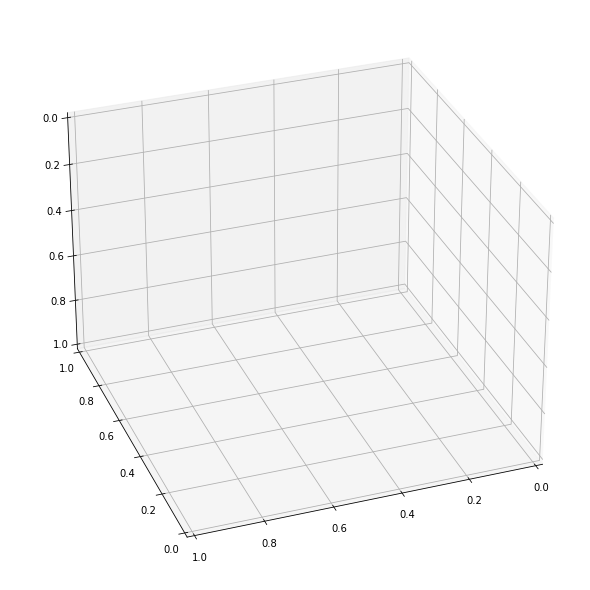

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necessary to do 3D plots

def plot3DScatter(X, y):
    # To getter a better understanding of interaction of the dimensions
    # plot the first three PCA dimensions    
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig, elev=-150, azim=110)
    

    # Plot the training points
    for c, name, col in zip(set(y), iris.target_names, ["tab:red", "tab:orange", "tab:blue"]):
        ax.scatter(X[y==c, 0], X[y==c, 1], X[y==c, 2], 
                   color = col, edgecolor='k', 
                   label = name, s=40)
        
    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.set_ylabel("2nd eigenvector")
    ax.set_zlabel("3rd eigenvector")
    ax.legend()    
    plt.show()
    
plot3DScatter(Xnew2, y)